## Shopping mall project
#### Clustering and identification of sales period and pattern

## Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()

'C:\\Users\\manas\\Downloads\\ML\\Project session by mithlesh sir\\Customer_Segmentation'

## Importing the dataset

In [4]:
customer_seg = pd.read_excel('Customer_Segment.xlsx')
pd.set_option('display.max_columns',100)
customer_seg.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Problem statement
  - Segment(Group/Cluster) customer on basis of buying pattern RFM(Recency,Frequency,Monetary)
  - Sales Trends for Day,Seasons,time by invoice number
  - Highest sale trend item wise

In [8]:
customer_seg.tail(90)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541819,581579,21121,NaN,SET/10 RED POLKADOT PARTY CANDLES,24,2011-12-09 12:19:00,1.25,17581.0,United Kingdom
541820,581579,23489,NaN,VINTAGE BELLS GARLAND,6,2011-12-09 12:19:00,2.89,17581.0,United Kingdom
541821,581579,23570,NaN,TRADITIONAL PICK UP STICKS GAME,12,2011-12-09 12:19:00,1.25,17581.0,United Kingdom
541822,581579,22993,NaN,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:19:00,1.25,17581.0,United Kingdom
541823,581579,23480,NaN,MINI LIGHTS WOODLAND MUSHROOMS,8,2011-12-09 12:19:00,3.75,17581.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,NaN,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,NaN,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,NaN,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,NaN,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## EDA

##### Creating a copy of the dataset

In [4]:
customer_seg_c = customer_seg.copy()
customer_seg_c.head(2)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##### Shape of the data

In [136]:
customer_seg_c.shape

# 541909 nos. of rows & 9 nos. of columns

(401604, 9)

##### Column names

In [6]:
customer_seg_c.columns

Index(['InvoiceNo', 'StockCode', 'lower', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

##### Observations:
- InvoiceNo - Invoice no. generated while processing the bill
- StockCode - Idetification of the product
- lower - Description of the items (column is repeated so we can drop it)
- Description - Description of the items 
- InvoiceDate - Date on which Invoice was generated
- UnitPrice - Price of each item
- CustomerID - Customer identification number

In [7]:
customer_seg_c.head(2)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##### Basic information about the data

In [8]:
customer_seg_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


##### Number of unique value in each column

In [9]:
customer_seg_c.nunique()

InvoiceNo      25900
StockCode       4070
lower            953
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

##### Observations:
- Total nos. of invoices generated - 25900
- Total nos. of customers from 38 different countries are 4372

##### Handling duplicates

In [10]:
customer_seg_c.duplicated().sum()

5268

In [11]:
# Dropping duplicate columns & row
customer_seg_c = customer_seg_c.drop_duplicates()

In [12]:
customer_seg_c.duplicated().sum()

0

In [13]:
# Droping the duplicate column 'lower'
customer_seg_c = customer_seg_c.drop('lower', axis = 1)

In [14]:
customer_seg_c.shape

(536641, 8)

##### Observation
- 5268 nos. of rows are duplicates so we will drop it

##### Handling null values

In [15]:
customer_seg_c.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [16]:
# customer_seg_c = customer_seg_c.dropna()

In [17]:
customer_seg_c = customer_seg_c.dropna(axis=0,how="any",subset=["CustomerID"])

In [18]:
customer_seg_c.shape

(401604, 8)

##### Observation
- After removing dulicates & null values now we have total 401604 nos. of rows & 8 nos. of columns

##### Statistical measures

In [19]:
customer_seg_c.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Visulaization

##### Countrywise sales

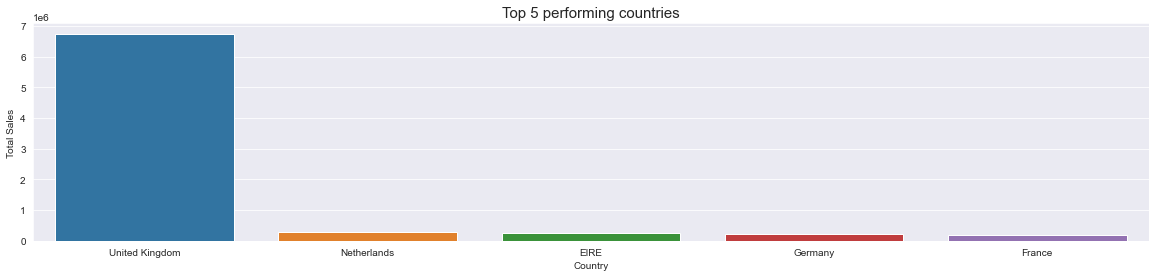

In [20]:
sales = pd.DataFrame()
sales['Total Sales'] = customer_seg_c['Quantity']*customer_seg_c['UnitPrice']
sales['CustomerID'] = customer_seg_c['CustomerID']
sales['Country'] = customer_seg_c['Country']
sales = sales.groupby(['Country']).sum()

sales = sales.sort_values(by=['Total Sales'], ascending=False)
sales = sales.head()
sales_1 = sales.reset_index()

plt.figure(figsize = (20,4))
sns.barplot(x = sales_1['Country'], y = sales_1['Total Sales'])
plt.title('Top 5 performing countries',size = 15)
plt.show()

##### Observation
 - Highest sales is in UK later on it's followed by Netherlands, EIRE, Germany & France
 - Below are the total sales detials of top 5 performing Countries

In [21]:
sales_1.drop('CustomerID', axis = 1) 

,Country,Total Sales
0,United Kingdom,6747156.154
1,Netherlands,284661.540
2,EIRE,250001.780
3,Germany,221509.470
4,France,196626.050


##### Top 10 buyers

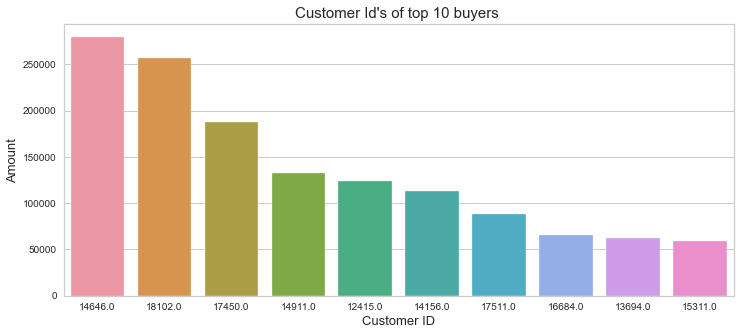

In [156]:
purchaser = pd.DataFrame()
purchaser['Total Sales'] = customer_seg_c['Quantity']*customer_seg_c['UnitPrice']
purchaser['CustomerID'] = customer_seg_c['CustomerID']
purchaser = purchaser.groupby(['CustomerID']).sum()
purchaser = purchaser.sort_values(by=['Total Sales'], ascending=False)
purchaser = purchaser.iloc[:10]
Elite_Purchaser = purchaser.index
High_purchase = (purchaser.values).flatten()

plt.figure(figsize = (12,5))
sns.barplot(x = Elite_Purchaser, y = High_purchase, order = Elite_Purchaser)
plt.xlabel('Customer ID',size = 13)
plt.ylabel('Amount', size = 13)
plt.title("Customer Id's of top 10 buyers ", size = 15)
plt.show()

#### Observation:
- High revenue is generated by customer-Id number 14646 of 279489.02/-
- Revenue generated by customer Id no. 18102 is 256438.49/-
- Revenue generated by customer Id no. 17450 is 187322.17/-
- Revenue generated by customer Id no. 14911 is 132458.73/-
- Revenue generated by customer Id no. 12415 is 123725.45/-

##### Top 5 selling products

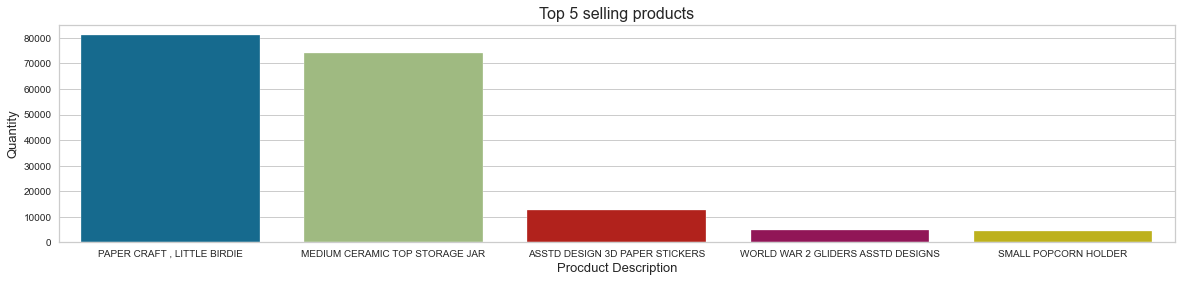

In [155]:
products = customer_seg_c.sort_values(by = ['Quantity'], ascending = False)
plt.figure(figsize = (20,4))
sns.barplot(x = products['Description'].head(), y = products['Quantity'].head())
plt.title('Top 5 selling products', size = 16)
plt.xlabel('Procduct Description',size = 13)
plt.ylabel('Quantity', size = 13)
plt.show()

##### Observation:
- below are the detials of top 5 selling products 

In [158]:
products.drop(['InvoiceDate', 'UnitPrice', 'CustomerID', 'StockCode'], axis = 1 ).head(5).reset_index()

,index,InvoiceNo,Description,Quantity,Country,Total Sales
0,540421,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,United Kingdom,168469.6
1,61619,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,United Kingdom,77183.6
2,502122,578841,ASSTD DESIGN 3D PAPER STICKERS,12540,United Kingdom,0.0
3,421632,573008,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,United Kingdom,1008.0
4,206121,554868,SMALL POPCORN HOLDER,4300,United Kingdom,3096.0


## Analyzing the data

In [25]:
min(products["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [26]:
max(products["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

##### Observation: 
- Dataset contains shopping mall information from year 2010 to 2011 (1 yr)

##### Total sales across 38 countries

In [27]:
sales = pd.DataFrame()
sales['Total Sales'] = customer_seg_c['Quantity']*customer_seg_c['UnitPrice']
sales['CustomerID'] = customer_seg_c['CustomerID']
sales['Country'] = customer_seg_c['Country']
sales = sales.groupby(['Country']).sum()
print('Total across thirty eight countries:') 
print((sales[sales["Total Sales"]>0]["Total Sales"]).sum())

Total across thirty eight countries:
8278519.424


##### Total nos. of returned  products 

In [28]:
customer_seg_c["Total Sales"] = customer_seg_c["Quantity"]*customer_seg_c["UnitPrice"]
print('Total nos. of products returned:') 
print((customer_seg_c[customer_seg_c["Quantity"]<0]["Quantity"]).sum())

Total nos. of products returned:
-273035


##### Total cost of returned products

In [29]:
print('Total cost of returned products:') 
print((customer_seg_c[customer_seg_c["Total Sales"]<0]["Total Sales"]).sum())

Total cost of returned products:
-608689.47


## Calculating RFM

In [30]:
# To calculate RFM keeping significant columns only
customer_segmen = customer_seg_c.drop(['StockCode','Description','Quantity','UnitPrice','Country','InvoiceDate','CustomerID'], axis = 1)

In [31]:
# Applying groupby function to calculate the total amount w.r.t dedicated invoice no.
customer_segmen = customer_segmen.groupby('InvoiceNo').sum()
customer_segmen.head(3)

,Total Sales
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73


In [32]:
# Removing duplicates based on invoice no.
customer_segmen1 = customer_seg_c.drop(['StockCode','Description','Quantity','UnitPrice','Country','Total Sales'], axis = 1)
customer_segmen1 = customer_segmen1.drop_duplicates(subset = 'InvoiceNo')
customer_segmen1.head(3)

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
7,536366,2010-12-01 08:28:00,17850.0
9,536367,2010-12-01 08:34:00,13047.0


In [33]:
# Merging the two dataframes
cust_seg = pd.merge(customer_segmen1,customer_segmen, how = 'left', on = 'InvoiceNo')
cust_seg.head(5)

,InvoiceNo,InvoiceDate,CustomerID,Total Sales
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [34]:
# Calculating latest & oldest date invoice no.
print('Latest date of invoice no. :', max(cust_seg["InvoiceDate"]))
print('Oldest date of invoice no. :', min(cust_seg["InvoiceDate"]))

Latest date of invoice no. : 2011-12-09 12:50:00
Oldest date of invoice no. : 2010-12-01 08:26:00


In [35]:
# importing datetime 
import datetime as dt
latest_date = dt.datetime(2011,12,11) # changing the latest date as 11 dec 2011
latest_date

datetime.datetime(2011, 12, 11, 0, 0)

In [36]:
# Calculating Recency Frequency and Monetary values as per the customer ID
RFM_Score = cust_seg.groupby('CustomerID').agg({'InvoiceDate': lambda x :(latest_date-x.max()).days, 'InvoiceNo' : lambda x : x.count(), 'Total Sales' : lambda x : x.sum()})
RFM_Score.head(3)

,InvoiceDate,InvoiceNo,Total Sales
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24


In [37]:
# Resetting the index
RFM_Score = RFM_Score.reset_index()
RFM_Score.head(3)

,CustomerID,InvoiceDate,InvoiceNo,Total Sales
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24


In [38]:
# Renaming the column names
RFM_Score = RFM_Score.rename(columns = {'InvoiceDate':'Recency', "InvoiceNo" : 'Frequency', 'Total Sales' : 'Monetary'})
RFM_Score.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24


In [39]:
RFM_Score.describe()

,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.581199,5.075480,1893.531433
std,1722.390705,100.772139,9.338754,8218.696204
min,12346.000000,1.000000,1.000000,-4287.630000
25%,13812.750000,17.000000,1.000000,291.795000
50%,15300.500000,51.000000,3.000000,644.070000
75%,16778.250000,144.000000,5.000000,1608.335000
max,18287.000000,374.000000,248.000000,279489.020000


##### Observation:
- There is a huge difference between maximum value & 75th percentile value so we will change the the percentile range

In [40]:
# changing the quantile range as per the requirement of the data set

<AxesSubplot:xlabel='Recency', ylabel='Proportion'>

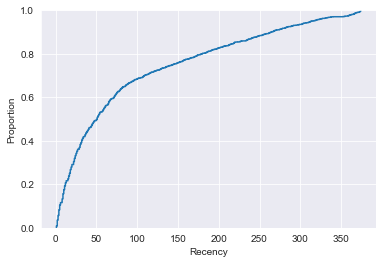

In [41]:
# Recency
sns.ecdfplot(data=RFM_Score["Recency"])

In [42]:
RFM_Score["Recency"].quantile(q=[0.39,0.55,0.801])

0.390     31.0
0.550     60.0
0.801    180.0
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

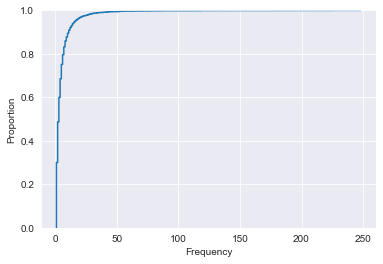

In [43]:
# Frequency
sns.ecdfplot(data=RFM_Score["Frequency"])

In [44]:
# import seaborn as sns
# plt.figure(figsize=(12,6))
# sns.distplot(RFM_Score["Frequency"],kde=True)

In [45]:
RFM_Score["Frequency"].quantile(q=[0.99,0.998,0.999])

0.990     36.000
0.998     78.032
0.999    118.000
Name: Frequency, dtype: float64

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

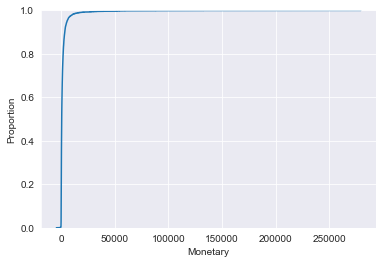

In [46]:
# Monetary
sns.ecdfplot(data=RFM_Score["Monetary"])

In [47]:
RFM_Score["Monetary"].quantile(q=[0.6785,0.98377,0.99611])

0.67850     1200.938340
0.98377    12007.907416
0.99611    50381.846856
Name: Monetary, dtype: float64

In [48]:
# passing the quantile range to rfm score & creating the function

In [49]:
quantile_r = RFM_Score.quantile(q=[0.39,0.55,0.801])
quantile_f = RFM_Score.quantile(q=[0.965,0.99451,0.998715])
quantile_m = RFM_Score.quantile(q=[0.6785,0.98377,0.99611])

In [50]:
# Recency

def R_Scoring(x,p,d):
    if x<=d[p][0.39]:
        return 4
    elif x<=d[p][0.55]:
        return 3
    elif x<=d[p][0.801]:
        return 2
    else:
        return 1

In [51]:
# Frequency

def F_Scoring(x,p,d):
    if x<= d[p][0.965]:
        return 1
    elif x<= d[p][0.99451]:
        return 2
    elif x<= d[p][0.998715]:
        return 3
    else:
        return 4

In [52]:
# Monetary

def M_Scoring(x,p,d):
    if x<= d[p][0.6785]:
        return 1
    elif x<=d[p][0.98377]:
        return 2
    elif x<=d[p][0.99611]:
        return 3
    else:
        return 4

In [53]:
quantile_r = RFM_Score.quantile(q=[0.39,0.55,0.801])
quantile_f = RFM_Score.quantile(q=[0.965,0.99451,0.998715])
quantile_m = RFM_Score.quantile(q=[0.6785,0.98377,0.99611])

In [54]:
RFM_Score['R'] = RFM_Score['Recency'].apply(R_Scoring, args = ('Recency', quantile_r))
RFM_Score['F'] = RFM_Score['Frequency'].apply(F_Scoring, args = ('Frequency', quantile_f))
RFM_Score['M'] = RFM_Score['Monetary'].apply(M_Scoring, args = ('Monetary', quantile_m))

In [55]:
RFM_Score.head(3)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,2,0.00,1,1,1
1,12347.0,3,7,4310.00,4,1,2
2,12348.0,76,4,1797.24,2,1,2


In [56]:
# Converting int into string form
RFM_Score['RFM_Score'] = RFM_Score.R.map(str)+RFM_Score.F.map(str)+RFM_Score.M.map(str)
RFM_Score.head(3)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,326,2,0.00,1,1,1,111
1,12347.0,3,7,4310.00,4,1,2,412
2,12348.0,76,4,1797.24,2,1,2,212


In [57]:
# Creating New Column RFM_Score_Sum
RFM_Score['RFM_Score_Sum'] = RFM_Score[['R','F','M']].sum(axis = 1)
RFM_Score.head(3)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Score_Sum
0,12346.0,326,2,0.00,1,1,1,111,3
1,12347.0,3,7,4310.00,4,1,2,412,7
2,12348.0,76,4,1797.24,2,1,2,212,5


In [58]:
# Assigning loyality level
Loyalty_level = ['Silver', 'Gold', 'Diamond', 'Platinum']

In [59]:
RFM_Score['Loyalty'] = pd.qcut(RFM_Score.RFM_Score_Sum, q = 4, labels = Loyalty_level)

In [60]:
RFM_Score.head(3)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Score_Sum,Loyalty
0,12346.0,326,2,0.00,1,1,1,111,3,Silver
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold


In [61]:
data = RFM_Score[['RFM_Score_Sum','Loyalty']].drop_duplicates().sort_values(by = 'RFM_Score_Sum' )
data = data.reset_index(drop = True)
data

,RFM_Score_Sum,Loyalty
0,3,Silver
1,4,Silver
2,5,Gold
3,6,Diamond
4,7,Platinum
5,8,Platinum
6,9,Platinum
7,10,Platinum
8,11,Platinum
9,12,Platinum


##### Observations:
- If RFM score is 3 or 4 the customer belongs to 'Silver' category
- If RFM score is 5 the customer belongs to 'Gold' category
- If RFM score is 6 the customer belongs to 'Diamond' category
- If RFM score ranges between 7 to 12 then the customer belongs to 'Platinum' category

In [62]:
# calcualting the total count of each unique category
RFM_Score['Loyalty'].value_counts()

Silver      1714
Diamond     1046
Platinum     898
Gold         714
Name: Loyalty, dtype: int64

##### Observations:
- Total 1714 nos. of customer belongs to 'Silver' category
- Total 714 nos. of customer belongs to 'Gold' category
- Total 1046 nos. of customer belongs to 'Diamond' category
- Total 898 nos. of customer belongs to 'Platinum' category

###### Visualization

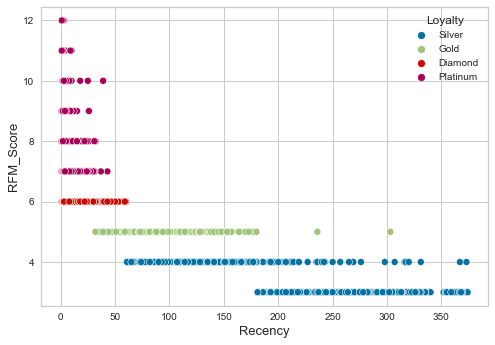

In [159]:
# Recency
sns.scatterplot(x = 'Recency', y = 'RFM_Score_Sum', hue = 'Loyalty', data = RFM_Score)
plt.xlabel('Recency',size = 13)
plt.ylabel('RFM_Score', size = 13)
plt.show()

In [64]:
print('Total nos. of customer having recency less than 10 days:',(RFM_Score[RFM_Score["Recency"]<10]["Recency"]).count(), 'nos.')

Total nos. of customer having recency less than 10 days: 686 nos.


##### Observations:
- If RFM score is 3 or 4 the customer belongs to 'Silver' category
- If RFM score is 5 the customer belongs to 'Gold' category
- If RFM score is 6 the customer belongs to 'Diamond' category
- If RFM score ranges between 7 to 12 then the customer belongs to 'Platinum' category
- Customer having recency less than 10 days belongs to 'Diamond & Platinum' category

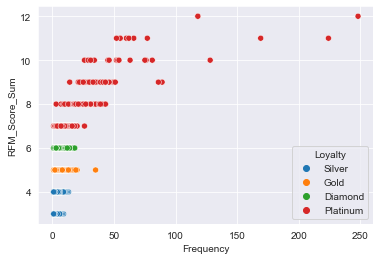

In [65]:
# Frequency
sns.scatterplot(x = 'Frequency', y = 'RFM_Score_Sum', hue = 'Loyalty',data = RFM_Score)
plt.show()

In [165]:
print('Total nos. of customer having frequency more than 50 days:',(RFM_Score[RFM_Score["Frequency"]>50]["Frequency"]).count(), 'nos.')

Total nos. of customer having frequency more than 50 days: 24 nos.


##### Observations
- Total 24 nos. of customers has generated invoice more than 50 times & they belong to platinum category

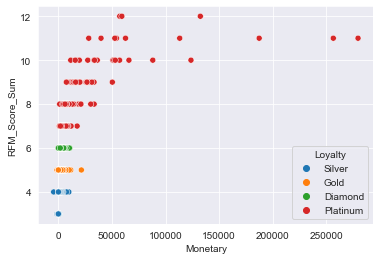

In [66]:
# Monetary
sns.scatterplot(x = 'Monetary', y = 'RFM_Score_Sum', hue = 'Loyalty',data = RFM_Score)
plt.show()

In [67]:
print('Total nos. of customers purchasing above 50k :',(RFM_Score[RFM_Score["Monetary"]>50000]["Monetary"]).count(), 'nos.')

Total nos. of customers purchasing above 50k : 18 nos.


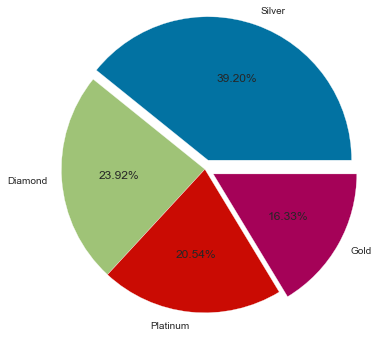

In [179]:
plt.pie(RFM_Score['Loyalty'].value_counts() , labels =  RFM_Score['Loyalty'].value_counts().index,autopct = '%0.02f%%', explode = [0.08,0,0,0.08],radius = 1.2)
plt.show()

##### Observations:
- 39.2% of customers belongs to Silver category 
- 16.33% of customers belongs to Gold category
- 23.92% of customers belongs to Diamond category
- 20.54% of customers belongs to Platinum category
- Most of the customers belongs to Silver category & followed by Gold category
- Need to pay attention to customers belongs to Silver category
- Customers falling under Diamond & Platinum category are promising & loyal customers 

## Applying K-means algorithm

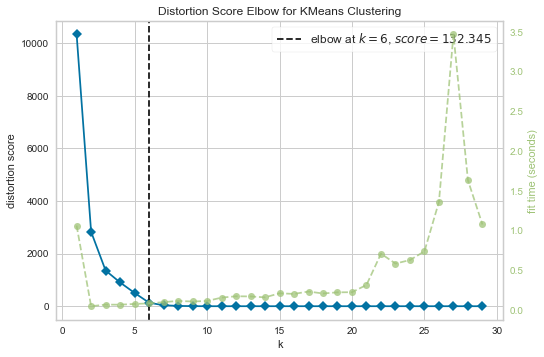

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,30))
visualizer.fit(RFM_Score[['RFM_Score_Sum']])     
visualizer.show() 

In [70]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init="k-means++", random_state = 42)
k_means = kmeans.fit_predict(RFM_Score[['RFM_Score_Sum']]) 
k_means 

array([4, 2, 1, ..., 3, 2, 3])

In [71]:
# Creating New Column
RFM_Score["Clusters"]= kmeans.labels_
RFM_Score.tail(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Score_Sum,Loyalty,Clusters
4367,18280.0,278,1,180.60,1,1,1,111,3,Silver,4
4368,18281.0,181,1,80.82,1,1,1,111,3,Silver,4
4369,18282.0,8,3,176.60,4,1,1,411,6,Diamond,3
4370,18283.0,4,16,2045.53,4,1,2,412,7,Platinum,2
4371,18287.0,43,3,1837.28,3,1,2,312,6,Diamond,3


##### Silhouette_score

In [72]:
# Silhouette_score
labels=kmeans.labels_
from sklearn.metrics import silhouette_score
print(silhouette_score(RFM_Score[['RFM_Score_Sum']],labels))

0.9645909119911461


##### Creating segments based on clusters

In [74]:
def Cluster_Names(x):
    if x == 0:
        return 'At Risk'
    elif x == 1:
        return 'Nurture'
    elif x == 2:
        return 'Promising'
    elif x == 3:
        return 'Target Upshell'
    elif x == 4:
        return 'Inactive'
    else:
        return 'Drive Loyalty'

In [75]:
RFM_Score["Clusters_Name"] = RFM_Score["Clusters"]
RFM_Score["Clusters_Name"] = [Cluster_Names(x) for x in RFM_Score.Clusters_Name]

In [76]:
RFM_Score.head(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Score_Sum,Loyalty,Clusters,Clusters_Name
0,12346.0,326,2,0.00,1,1,1,111,3,Silver,4,Inactive
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum,2,Promising
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold,1,Nurture
3,12349.0,19,1,1757.55,4,1,2,412,7,Platinum,2,Promising
4,12350.0,311,1,334.40,1,1,1,111,3,Silver,4,Inactive


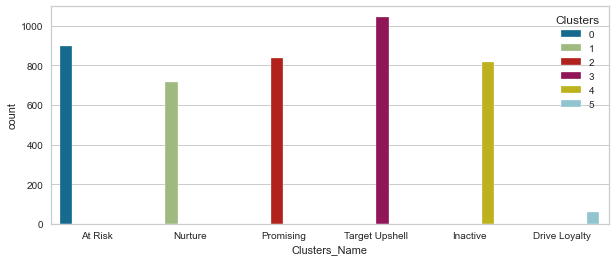

In [77]:
plt.figure(figsize = (10,4))
sns.countplot(x = RFM_Score['Clusters_Name'], hue = RFM_Score['Clusters'], order = ['At Risk', 'Nurture', 'Promising', 'Target Upshell', 'Inactive', 'Drive Loyalty'])
plt.show()

##### Observations

In [187]:
print('Total number of customers belongs to at-risk category :',RFM_Score[RFM_Score['Clusters_Name']=='At Risk']['Clusters_Name'].count(), 'nos.')

Total number of customers belongs to at-risk category : 897 nos.


In [188]:
print('Total number of customers belongs to nurture category :',RFM_Score[RFM_Score['Clusters_Name']=='Nurture']['Clusters_Name'].count(), 'nos.')

Total number of customers belongs to nurture category : 714 nos.


In [189]:
print('Total number of promising customers :',RFM_Score[RFM_Score['Clusters_Name']=='Promising']['Clusters_Name'].count(), 'nos.')

Total number of promising customers : 839 nos.


In [190]:
print('Total number of customers belongs to target upshell category :',RFM_Score[RFM_Score['Clusters_Name']=='Target Upshell']['Clusters_Name'].count(), 'nos.')

Total number of customers belongs to target upshell category : 1046 nos.


In [191]:
print('Total number of inactive customers :',RFM_Score[RFM_Score['Clusters_Name']=='Inactive']['Clusters_Name'].count(), 'nos.')

Total number of inactive customers : 817 nos.


In [192]:
print('Total number of customers belong to drive loyalty category :',RFM_Score[RFM_Score['Clusters_Name']=='Drive Loyalty']['Clusters_Name'].count(), 'nos.')

Total number of customers belong to drive loyalty category : 59 nos.


##### Analyzing the data based on numbers of invoice genrated per day, seasons wise or time of the day visited

In [194]:
# Converting object into datetime format

In [84]:
customer_seg_c["InvoiceDate"]=pd.to_datetime(customer_seg_c["InvoiceDate"])

In [85]:
df = customer_seg_c[['InvoiceNo','InvoiceDate', 'Country', 'CustomerID']]
df = df.groupby('InvoiceNo').first()
df = df.reset_index()
df.head()

,InvoiceNo,InvoiceDate,Country,CustomerID
0,536365,2010-12-01 08:26:00,United Kingdom,17850.0
1,536366,2010-12-01 08:28:00,United Kingdom,17850.0
2,536367,2010-12-01 08:34:00,United Kingdom,13047.0
3,536368,2010-12-01 08:34:00,United Kingdom,13047.0
4,536369,2010-12-01 08:35:00,United Kingdom,13047.0


In [86]:
# Extraction of day from invoicedate column
import datetime as dt
df['Day'] = df['InvoiceDate'].dt.day_name()

In [87]:
# Extraction of month from invoicedate column
import datetime as dt
df['Month'] = df['InvoiceDate'].dt.month

In [88]:
# Adding seasons column

In [89]:
def month(x):
    if x in range(3,6):
        return 'Summer'
    elif x in range(6,9):
        return 'Monsoon'
    elif x in range(9,12):
        return 'Pre-Winter'
    else:
        return 'Winter'

In [90]:
df["Seasons"] = df["Month"]
df["Seasons"] = [month(x) for x in df.Seasons]

In [91]:
# Extraction of day-time from invoicedate column
import datetime as dt
df['Day_hour'] = df['InvoiceDate'].dt.hour

In [92]:
# Adding seasons day-time column

In [238]:
def day_time(x):
    if x in range(5,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,21):
        return 'Evening'
    else:
        return 'Night'

In [239]:
df["Visited_time"] = df["Day_hour"]
df["Visited_time"] = [day_time(x) for x in df.Day_hour]

In [274]:
df.head(3)

,InvoiceNo,InvoiceDate,Country,CustomerID,Day,Month,Seasons,Day_hour,Visited_time
0,536365,2010-12-01 08:26:00,United Kingdom,17850.0,Wednesday,12,Winter,8,Morning
1,536366,2010-12-01 08:28:00,United Kingdom,17850.0,Wednesday,12,Winter,8,Morning
2,536367,2010-12-01 08:34:00,United Kingdom,13047.0,Wednesday,12,Winter,8,Morning


### Visualization of overall data
- visualizing the data based on numbers of invoice generated per day/Season wise/time of day visited

In [241]:
# No. of invoice generated per day

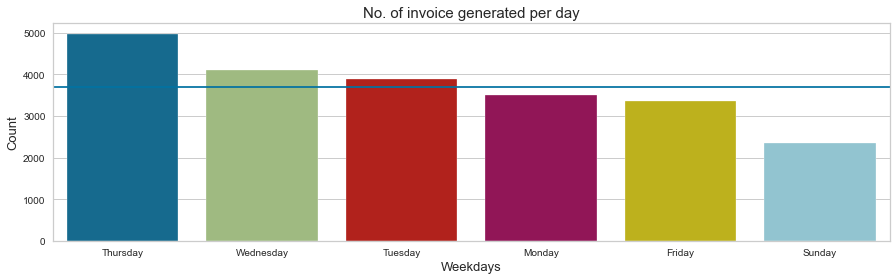

In [242]:
plt.figure(figsize = (15,4))
sns.barplot(x = df['Day'].value_counts().index, y = df['Day'].value_counts().values)
plt.axhline(y = df['Day'].value_counts().mean())
plt.title('No. of invoice generated per day', size = 15)
plt.xlabel('Weekdays', size = 13)
plt.ylabel('Count', size = 13)
plt.show()

In [243]:
print(df['Day'].value_counts())

Thursday     4978
Wednesday    4110
Tuesday      3892
Monday       3512
Friday       3356
Sunday       2342
Name: Day, dtype: int64


##### Observations :
- Most of the invoices were generated on Thursday followed by Wednesday & Tuesday that means most of the customers visits on these days.
- Less than average number of invoices generated on Monday, Friday & Sunday that means few customers visit the shopping.mall on these days

In [244]:
# No. of invoice generated according to seasons

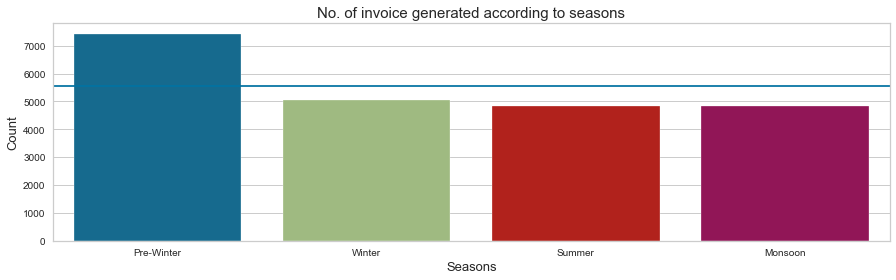

In [245]:
plt.figure(figsize = (15,4))
sns.barplot(x = df['Seasons'].value_counts().index, y = df['Seasons'].value_counts().values)
plt.axhline(y = df['Seasons'].value_counts().mean())
plt.title('No. of invoice generated according to seasons', size = 15)
plt.xlabel('Seasons', size = 13)
plt.ylabel('Count', size = 13)
plt.show()

In [246]:
print(df['Seasons'].value_counts())

Pre-Winter    7427
Winter        5067
Summer        4852
Monsoon       4844
Name: Seasons, dtype: int64


##### Observations :
- High numbers of invoices were generated during pre-winter seasons
- Mall is crowded during pre-winter & winter season

In [ ]:
def day_time(x):
    if x in range(5,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,21):
        return 'Evening'
    else:
        return 'Night'

In [247]:
# No. of invoice generated by time of the day

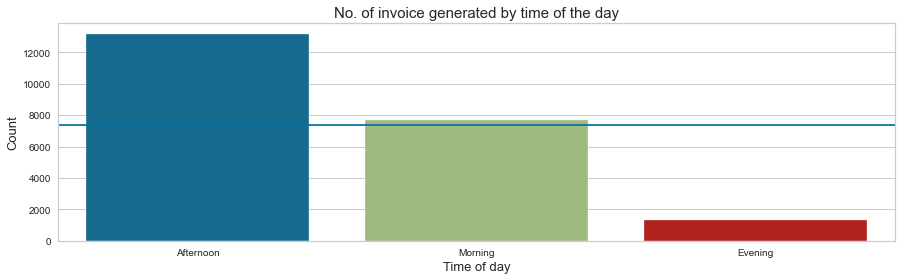

In [248]:
plt.figure(figsize = (15,4))
sns.barplot(x = df['Visited_time'].value_counts().index, y = df['Visited_time'].value_counts().values)
plt.axhline(y = df['Visited_time'].value_counts().mean())
plt.title('No. of invoice generated by time of the day', size = 15)
plt.xlabel('Time of day', size = 13)
plt.ylabel('Count', size = 13)
plt.show()

In [249]:
print(df['Visited_time'].value_counts())

Afternoon    13180
Morning       7666
Evening       1344
Name: Visited_time, dtype: int64


##### Observations:
- High number of customers prefer to visit mall between 12pm to 5pm. As we can see from graph large no of invoices generated during afternoon period

In [ ]:
def day_time(x):
    if x in range(5,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,21):
        return 'Evening'
    else:
        return 'Night'

## Details of top 3 preforming countries

### United Kingdom

In [251]:
uk = df[df["Country"] == 'United Kingdom'][['InvoiceNo', 'InvoiceDate','CustomerID', 'Day', 'Seasons', "Visited_time"]]
uk.head(3)

,InvoiceNo,InvoiceDate,CustomerID,Day,Seasons,Visited_time
0,536365,2010-12-01 08:26:00,17850.0,Wednesday,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,Wednesday,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,Wednesday,Winter,Morning


In [252]:
# No. of invoice generated per day

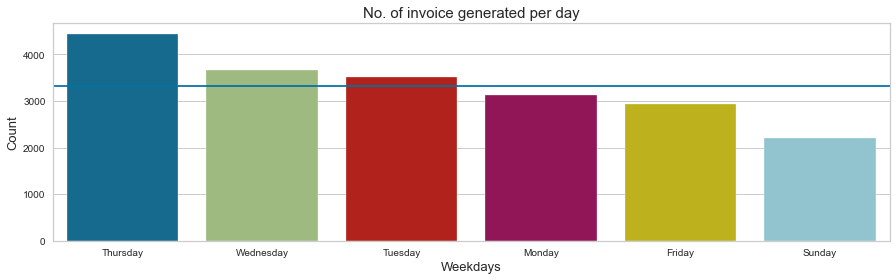

In [253]:
plt.figure(figsize = (15,4))
sns.barplot(x = uk['Day'].value_counts().index, y = uk['Day'].value_counts().values)
plt.axhline(y = uk['Day'].value_counts().mean())
plt.title('No. of invoice generated per day', size = 15)
plt.xlabel('Weekdays', size = 13)
plt.ylabel('Count', size = 13)
plt.show()

In [254]:
# No. of invoice generated according to seasons

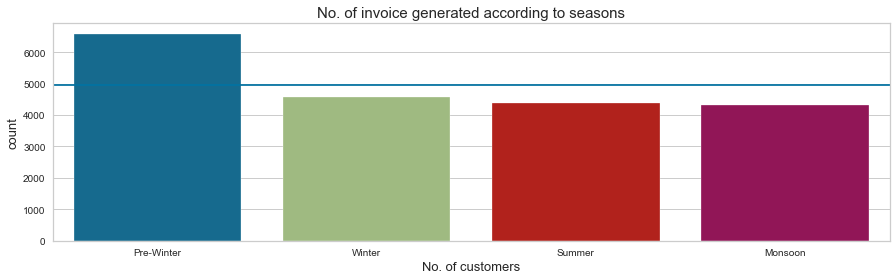

In [255]:
plt.figure(figsize = (15,4))
sns.barplot(x = uk['Seasons'].value_counts().index, y = uk['Seasons'].value_counts().values)
plt.axhline(y = uk['Seasons'].value_counts().mean())
plt.title('No. of invoice generated according to seasons', size = 15)
plt.xlabel('No. of customers', size = 13)
plt.ylabel('count', size = 13)
plt.show()

In [256]:
# No. of invoice generated by time of the day

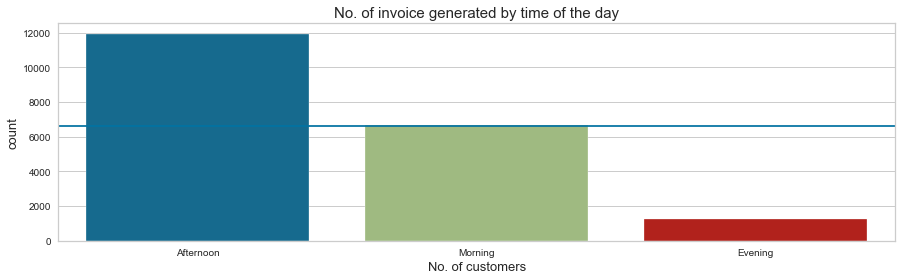

In [257]:
plt.figure(figsize = (15,4))
sns.barplot(x = uk['Visited_time'].value_counts().index, y = uk['Visited_time'].value_counts().values)
plt.axhline(y = uk['Visited_time'].value_counts().mean())
plt.title('No. of invoice generated by time of the day', size = 15)
plt.xlabel('No. of customers', size = 13)
plt.ylabel('count', size = 13)
plt.show()

### Netherlands

In [258]:
Netherlands = df[df["Country"] == 'Netherlands'][['InvoiceNo', 'InvoiceDate','CustomerID', 'Day', 'Seasons', "Visited_time"]]
uk.head(3)

,InvoiceNo,InvoiceDate,CustomerID,Day,Seasons,Visited_time
0,536365,2010-12-01 08:26:00,17850.0,Wednesday,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,Wednesday,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,Wednesday,Winter,Morning


In [259]:
# No. of invoice generated per day

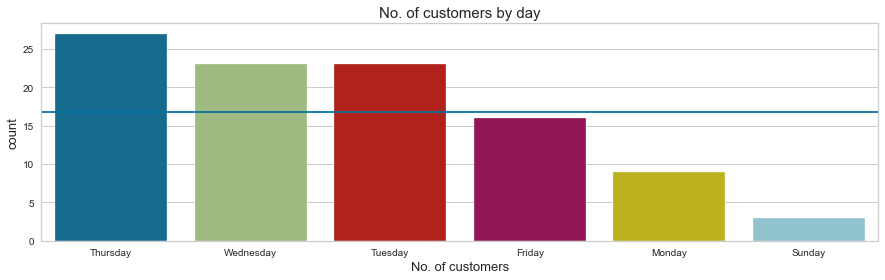

In [260]:
plt.figure(figsize = (15,4))
sns.barplot(x = Netherlands['Day'].value_counts().index, y = Netherlands['Day'].value_counts().values)
plt.axhline(y = Netherlands['Day'].value_counts().mean())
plt.title('No. of customers by day', size = 15)
plt.xlabel('No. of customers', size = 13)
plt.ylabel('count', size = 13)
plt.show()

In [261]:
# No. of invoice generated according to seasons

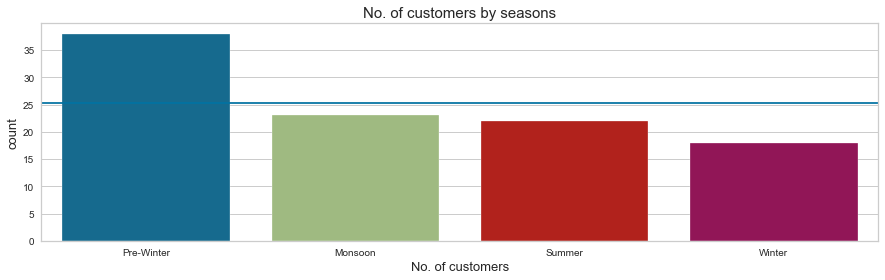

In [262]:
plt.figure(figsize = (15,4))
sns.barplot(x = Netherlands['Seasons'].value_counts().index, y = Netherlands['Seasons'].value_counts().values)
plt.axhline(y = Netherlands['Seasons'].value_counts().mean())
plt.title('No. of customers by seasons', size = 15)
plt.xlabel('No. of customers', size = 13)
plt.ylabel('count', size = 13)
plt.show()

In [263]:
# No. of invoice generated by time of the day

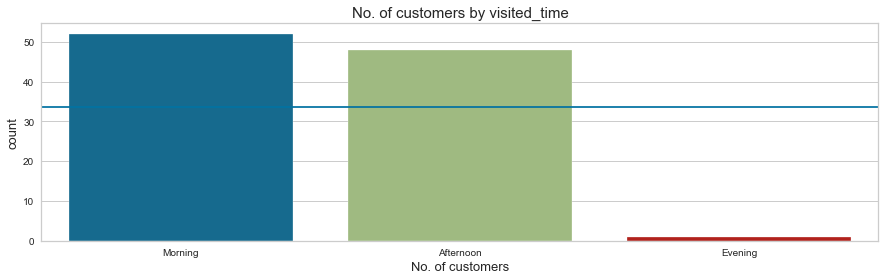

In [264]:
plt.figure(figsize = (15,4))
sns.barplot(x = Netherlands['Visited_time'].value_counts().index, y = Netherlands['Visited_time'].value_counts().values)
plt.axhline(y = Netherlands['Visited_time'].value_counts().mean())
plt.title('No. of customers by visited_time', size = 15)
plt.xlabel('No. of customers', size = 13)
plt.ylabel('count', size = 13)
plt.show()

### EIRE

In [265]:
EIRE = df[df["Country"] == 'EIRE'][['InvoiceNo', 'InvoiceDate','CustomerID', 'Day', 'Seasons', "Visited_time"]]
uk.head(3)

,InvoiceNo,InvoiceDate,CustomerID,Day,Seasons,Visited_time
0,536365,2010-12-01 08:26:00,17850.0,Wednesday,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,Wednesday,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,Wednesday,Winter,Morning


In [266]:
# No. of invoice generated per day

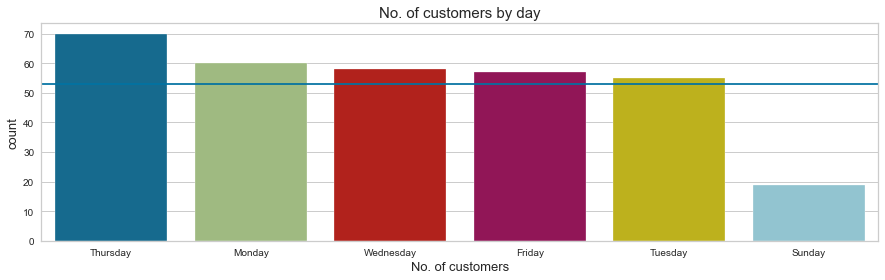

In [267]:
plt.figure(figsize = (15,4))
sns.barplot(x = EIRE['Day'].value_counts().index, y = EIRE['Day'].value_counts().values)
plt.axhline(y = EIRE['Day'].value_counts().mean())
plt.title('No. of customers by day', size = 15)
plt.xlabel('No. of customers', size = 13)
plt.ylabel('count', size = 13)
plt.show()

In [268]:
# No. of invoice generated according to seasons

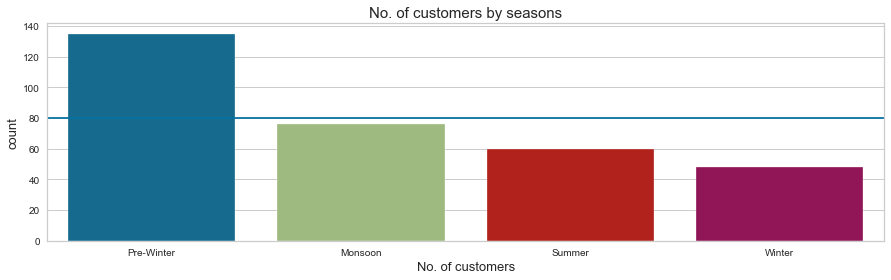

In [269]:
plt.figure(figsize = (15,4))
sns.barplot(x = EIRE['Seasons'].value_counts().index, y = EIRE['Seasons'].value_counts().values)
plt.axhline(y = EIRE['Seasons'].value_counts().mean())
plt.title('No. of customers by seasons', size = 15)
plt.xlabel('No. of customers', size = 13)
plt.ylabel('count', size = 13)
plt.show()

In [270]:
# No. of invoice generated by time of the day

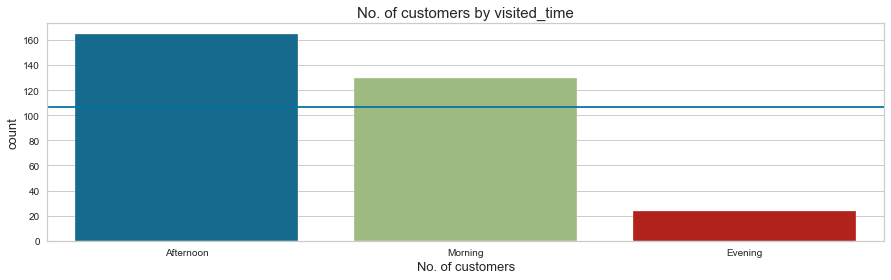

In [271]:
plt.figure(figsize = (15,4))
sns.barplot(x = EIRE['Visited_time'].value_counts().index, y = EIRE['Visited_time'].value_counts().values)
plt.axhline(y = EIRE['Visited_time'].value_counts().mean())
plt.title('No. of customers by visited_time', size = 15)
plt.xlabel('No. of customers', size = 13)
plt.ylabel('count', size = 13)
plt.show()

## Conclusion

- With the help of K-means clustering we've differentiated customers into six different categories which are as follows:
  - Total number of inactive customers : 817 nos.
  - Total number of customers belongs to at-risk category : 897 nos.
  - Total number of customers belongs to nurture category : 714 nos.
  - Total number of customers belongs to target upshell category : 1046 nos.
  - Total number of promising customers : 839 nos.
  - Total number of customers belong to drive loyalty category : 59 nos.
  
 - Need to pay attention to the customers who belong to at risk category as there are chances of losing them
 
 - Also, need to pay attention to the customers who belong to nurture category
 
 
- List of top 5 selling products
  - Paper Craft , Little Birdie
  - Medium Ceramic Top Storage Jar
  - Asstd Design 3d Paper Stickers
  - World War 2 Gliders Asstd Designs 
  - Small Popcorn Holder
  

- High number of customers prefer to visit shopping mall during day time period (i.e btwn Morning to Afternoon)


- Most of the people prefer to visit shopping mall on Thursday and followed by Wednesday & Tuesday